In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ruta_checkins = '../DATASETS/checkin_normalized.csv'

In [3]:
# Open file checkin
df_checkin = pd.read_csv(ruta_checkins)
df_checkin.head()

,Unnamed: 0,business_id,date
0,18769,-Ijm5ICZUZffTo3iumczrw,2015-04-26 12:52:47
1,18770,-Ijm5ICZUZffTo3iumczrw,2015-05-01 16:56:13
2,18771,-Ijm5ICZUZffTo3iumczrw,2015-05-23 23:54:48
3,18772,-Ijm5ICZUZffTo3iumczrw,2015-09-08 17:48:22
4,18773,-Ijm5ICZUZffTo3iumczrw,2015-10-29 20:27:43


Convertir la fecha a un formato de solo fechas sin horas

In [4]:
df_checkin.columns

Index(['Unnamed: 0', 'business_id', 'date'], dtype='object')

In [5]:
# Convierte la columna "date" a tipo fecha
df_checkin['date'] = pd.to_datetime(df_checkin['date'])

# Extrae solo la parte de la fecha (sin hora)
df_checkin['date'] = df_checkin['date'].dt.date

In [6]:
df_checkin['date'] = pd.to_datetime(df_checkin['date'], format="%Y-%m-%d")

In [7]:
df_checkin['mes'] = df_checkin['date'].dt.month

In [8]:
df_checkin['crecimiento_mensual_checkins'] = df_checkin['Unnamed: 0'].groupby(df_checkin['mes']).transform(lambda x: x.diff())

In [9]:
df_checkin['crecimiento_mensual'] = (df_checkin['crecimiento_mensual_checkins'] / df_checkin['Unnamed: 0'].groupby(df_checkin['mes']).transform(pd.Series.shift, 1)) * 100

In [10]:
df_checkin['crecimiento_mensual'] = df_checkin['crecimiento_mensual'].fillna(df_checkin['crecimiento_mensual'].median())

In [11]:
df_checkin['crecimiento_mensual_checkins'] = df_checkin['crecimiento_mensual_checkins'].fillna(df_checkin['crecimiento_mensual_checkins'].median())

In [12]:
df_checkin

,Unnamed: 0,business_id,date,mes,crecimiento_mensual_checkins,crecimiento_mensual
0,18769,-Ijm5ICZUZffTo3iumczrw,2015-04-26,4,1.0,0.000088
1,18770,-Ijm5ICZUZffTo3iumczrw,2015-05-01,5,1.0,0.000088
2,18771,-Ijm5ICZUZffTo3iumczrw,2015-05-23,5,1.0,0.005328
3,18772,-Ijm5ICZUZffTo3iumczrw,2015-09-08,9,1.0,0.000088
4,18773,-Ijm5ICZUZffTo3iumczrw,2015-10-29,10,1.0,0.000088
...,...,...,...,...,...,...
56521,3524327,zvlJoRJfViu-_dZflUn6Bw,2017-06-03,6,4601.0,0.130720
56522,3524328,zvlJoRJfViu-_dZflUn6Bw,2020-08-13,8,4592.0,0.130464
56523,3524329,zvlJoRJfViu-_dZflUn6Bw,2020-08-13,8,1.0,0.000028
56524,3524330,zvlJoRJfViu-_dZflUn6Bw,2021-03-28,3,9.0,0.000255


In [13]:
df_checkin.columns

Index(['Unnamed: 0', 'business_id', 'date', 'mes',
       'crecimiento_mensual_checkins', 'crecimiento_mensual'],
      dtype='object')

In [18]:
df_checkin['trimestre'] = df_checkin['date'].dt.quarter

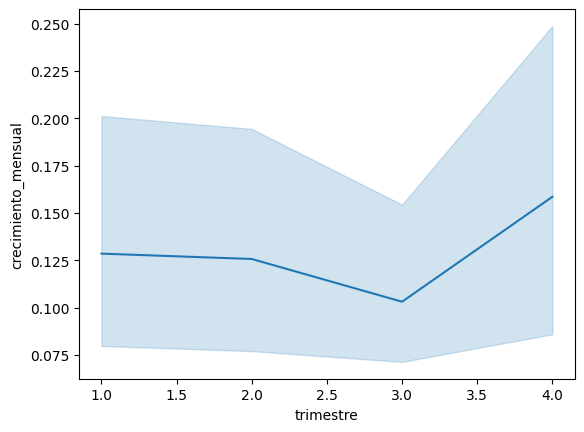

In [20]:
sns.lineplot(x='trimestre', y='crecimiento_mensual', data=df_checkin)
plt.show()